# Data Loading and Preparation
In this notebook we show: 
- How to use our data loader implementation specifically built for the DeftCorpus dataset ?
- How we prepared the DeftCorpus dataset for usage for Sentence Definition Classification ?

If you need assitance to understand the dataset, the folder hierarchy and the basics of the data, refere to teh README.md of the project. We assume you have read this and have a clear vision of the data format before looking into this notebook.

In [1]:
#imports cell
import pandas as pd
from source.data_loader import DeftCorpusLoader

## Loading dataset for classification using DeftCorpusLoader
Recall that the dataset in it's original format is not ready for the classification task and that we have to first run a convert script to put it into the classification format we need. For our convience, we built a Loader class that helps us in every aspect of loading, converting and preprocssing the dataset.

Possible Steps for Class Usages:

- Create instance of the class, with the path to your **"data" folder** from "deft_corpus" folder.


- Call `load_classification_data` on class instance with **no arguments passed**, this will create two folders in "deft_files" folder by default including the re-formatted for classification task. Then will load these files and return two dataframes. The two dataframes include two splits, a training split and a development split (used for testing purposes during Training phase of Competition)


- Alternatively, you can call `convert_to_classififcation_format` on class instance with **no arguments passed or pass arguments to specify folders and not use defaults** to first convert and create the two folders. The, call `load_classification_data` with the folders paths created from by the first method. This alternative way is provided for those who intend to work with **their own folder paths rather than the provided defaults.**


- Note that, you can pass `preprocess=True` and `clean=True` arguments to the `load_classification_data` to efficently load, preprocess and clean data for you all in one line. For explaination and reporting purposes we rather split those functions usage in this notebook but you are free to use either of both approaches.

*In this notebook, we use the rather easier and preferred method one.*

In [2]:
deft_loader = DeftCorpusLoader("deft_corpus/data")
trainframe, devframe = deft_loader.load_classification_data()

### Exploring dataset 
- There are two columns: `Sentence` which has the sentence text, `HasDef` boolean value to determine whether it is a definition or not. 
- There are **18,157 instances for training** and **865 instances for development** (testing purposes here)
- There are **duplicates sentences**, those has to be removed in the cleaning process.

In [3]:
deft_loader.explore_data(trainframe, "train")
deft_loader.explore_data(devframe, "dev")


Head of  train  Dataframe:
                                            Sentence  HasDef
0   3918 . You may recall that 6 x 6 = 36 , 6 x 7...       0
1   Memorizing these facts is rehearsal . Another...       1
2   Chunking is useful when trying to remember in...       0
3   3921 . Use elaborative rehearsal : In a famou...       1
4      Their theory is called levels of processing .       0
Number of instances of  train is 18157
Statistics of Sentences:
count                   18157
unique                  16772
top        ( See [ link ] . )
freq                        6
Name: Sentence, dtype: object

Head of  dev  Dataframe:
                                            Sentence  HasDef
0   309 . Both photosystems have the same basic s...       1
1   Each photosystem is serviced by the light - h...       0
2   The absorption of a single photon or distinct...       0
3   390 . Mistakes in the duplication or distribu...       0
4   To prevent a compromised cell from continuing...       0


### Exploring classes and classification problem
- There are **12,143 instances** of class label `0` ---> `This sentence is not a definition`.
- There are **6,014 instances** of class label `1` ---> `This sentence is a definition`.
- Determining problem: **Binary Classification Problem.**
- A clear **classes imbalance** case exists in our data. 

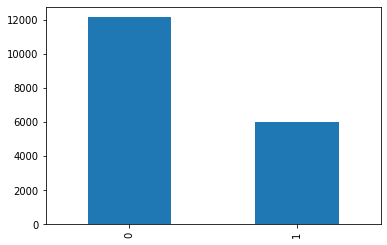

In [4]:
trainframe.HasDef.value_counts().plot.bar()

## Preprocessing dataset using Spacy
- Tokenizing corpus sentences into word tokens.
- Lemmatization of each token. 
- Lowercase each token. 
- Removing stop words, punctuations, spaces and non alphanumeric characters.
- Adds a column on the dataframe for preprocessed tokens according to above rules.

In [5]:
deft_loader.preprocess_data(trainframe)
deft_loader.preprocess_data(devframe)
trainframe

,Sentence,HasDef,Parsed
0,"3918 . You may recall that 6 x 6 = 36 , 6 x 7...",0,"[recall, x, x, x]"
1,Memorizing these facts is rehearsal . Another...,1,"[memorizing, fact, rehearsal, strategy, chunk,..."
2,Chunking is useful when trying to remember in...,0,"[chunking, useful, try, remember, information,..."
3,3921 . Use elaborative rehearsal : In a famou...,1,"[use, elaborative, rehearsal, famous, article,..."
4,Their theory is called levels of processing .,0,"[theory, call, level, process]"
...,...,...,...
18152,The term culture refers to all of the beliefs...,1,"[term, culture, refer, belief, custom, art, tr..."
18153,Culture is transmitted to people through lang...,0,"[culture, transmit, people, language, model, c..."
18154,4306 . Another method for assessment of perso...,0,"[method, assessment, personality, projective, ..."
18155,This kind of test relies on one of the defens...,1,"[kind, test, rely, defense, mechanism, propose..."


## Cleaning dataset
We make the following findings from the data shown above: 
- There are sentences which are likely to be of **very low importance** and contribution to the dataset. **Identifying and removing** these sentences can improve the classficiation process. Look for example at instance 1 from above, This list `[recall, x, x, x]` probably won't be of any importance when used with the classifier. 


- Devised method inferred from what the data looks like: **Only keep instances with number of tokens more than or equal to 5 tokens.**




- When this method is applied, **1,151 instances of non definitions** are removed while **120 only sentences that are definition** are removed. That proves that sentences with less than 5 tokens could be very less important to our work and also indeed helps to reslove the class imbalance problem in dataset a little bit.


- Secondly, since we found out that the corpus has duplicates when exploring above. **Removing duplicates** is the second method we employ in our cleaning process. 

In [6]:
deft_loader.clean_data(trainframe)
deft_loader.clean_data(devframe)
deft_loader.explore_data(trainframe, "train")
deft_loader.explore_data(devframe, "dev")


Head of  train  Dataframe:
                                            Sentence  HasDef  \
1   Memorizing these facts is rehearsal . Another...       1   
2   Chunking is useful when trying to remember in...       0   
3   3921 . Use elaborative rehearsal : In a famou...       1   
5   If we want to remember a piece of information...       0   
6   3924 . Cognitive development involves learnin...       1   

                                              Parsed  
1  [memorizing, fact, rehearsal, strategy, chunk,...  
2  [chunking, useful, try, remember, information,...  
3  [use, elaborative, rehearsal, famous, article,...  
5  [want, remember, piece, information, think, de...  
6  [cognitive, development, involve, learn, atten...  
Number of instances of  train is 15630
Statistics of Sentences:
count                                                 15630
unique                                                15630
top        Midterm elections are held because all member...
freq         

## Results at the end of the process
- There are **15,630 instances** for training and **785 instances** for evaluation left after the whole process is done.


- There is still a clear imbalance between the two classes that we have to take care of and consider. To deal with this imbalance, techniques like SMOTE (Synthetic Minority Over-sampling) technique or using class weights while classififcation.

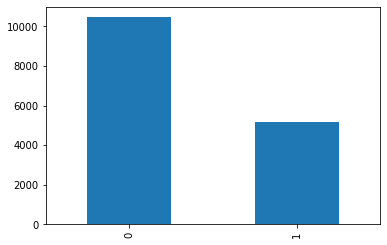

In [7]:
# Showing classes imbalance state after cleaning process.
trainframe.HasDef.value_counts().plot.bar()